[[GUIDE, KOR, DG] 데이터 분석 어떻게 시작해야 하나요?](https://www.kaggle.com/daehungwak/guide-kor-dg)


1. 데이터 분석 시작하기 앞서서
2. 데이터 셋 확인
3. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis)
4. 특성 공학 (Feature Engineering)
5. 모델 개발 및 학습
  - scikit-learn을 사용한 RandomForest모델 개발
  - keras를 사용한 NN 모델 개발 (미완)
6. 모델 예측 및 평가
  - RandomForest 예측 및 평가
  - NN 예측 및 평가 (미완)
7. 결론
8. 어떻게 공부하는게 좋을까요?

# 1. 데이터 셋 확인




In [1]:
# import module
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

#ignore warnings
import warnings
warnings.filterwarnings('ignore') # 워닝 메세지 생략

%matplotlib inline

In [2]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
os.listdir("/content/drive/My Drive/Colab Notebooks/data/")

['eng-fra.txt',
 'freeformResponses.csv',
 'names',
 'test.mp4',
 'test.wav',
 'asr-install.sh',
 'house_tiny.csv',
 'schema.csv',
 'multipleChoiceResponses.csv',
 'conversionRates.csv',
 'train.csv',
 'test.csv',
 'sampleSubmission.csv',
 'Score_0.33092_submission.csv',
 'sample_submission.csv',
 'test_kaggle.csv',
 'train-kaggle.csv']

In [4]:
df_train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/train-kaggle.csv')
df_test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/test_kaggle.csv')
df_submit = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/sample_submission.csv')

In [5]:
df_train.shape, df_test.shape, df_submit.shape

((891, 12), (418, 11), (418, 2))

In [6]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df_submit.columns

Index(['PassengerId', 'Survived'], dtype='object')

In [8]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


타이타닉 데이터 Feature
- survival - 생존유무, target 값. (0 = 사망, 1 = 생존)
- pclass - 티켓 클래스. (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex - 성별
- Age - 나이(세)
- sibsp - 함께 탑승한 형제자매, 배우자 수 총합
- parch - 함께 탑승한 부모, 자녀 수 총합
- ticket - 티켓 넘버
- fare - 탑승 요금
- cabin - 객실 넘버
- bembarked - 탑승 항구

In [11]:
df_train.dtypes # feature types

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
df_train.describe() # feature 기초 통계량

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 결측치(Null Data) 확인 

In [14]:
df_train.isnull().sum() / df_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [15]:
df_train.isnull().sum(), df_train.shape[0]

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64, 891)

In [16]:
df_test.isnull().sum() / df_test.shape[0]

PassengerId    0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [17]:
df_test.isnull().sum(), df_test.shape[0]

(PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64, 418)

### 1.2 Target Label, Survived 확인

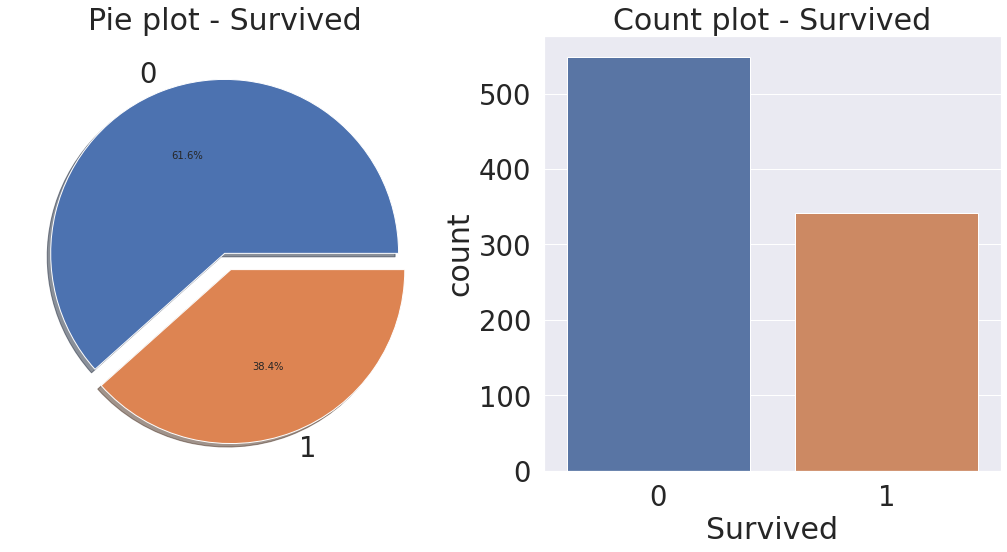

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# 2. 탐색적 데이터 분석 (EDA, Exploratory Data Analysis

### 2.1 Pcalss

In [19]:
# pcalss 그룹 별 데이터 카운트
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [20]:
# pclass 그룹 별 생존자 수 합
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [21]:
# 위와 같은 작업을 crosstab으로 편하게 진행
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [22]:
# mean은 생존률
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


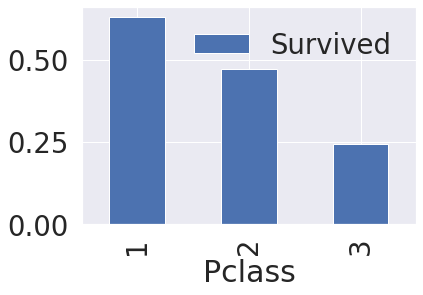

In [23]:
# 생존률 시각화
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

### 2.2 Sex

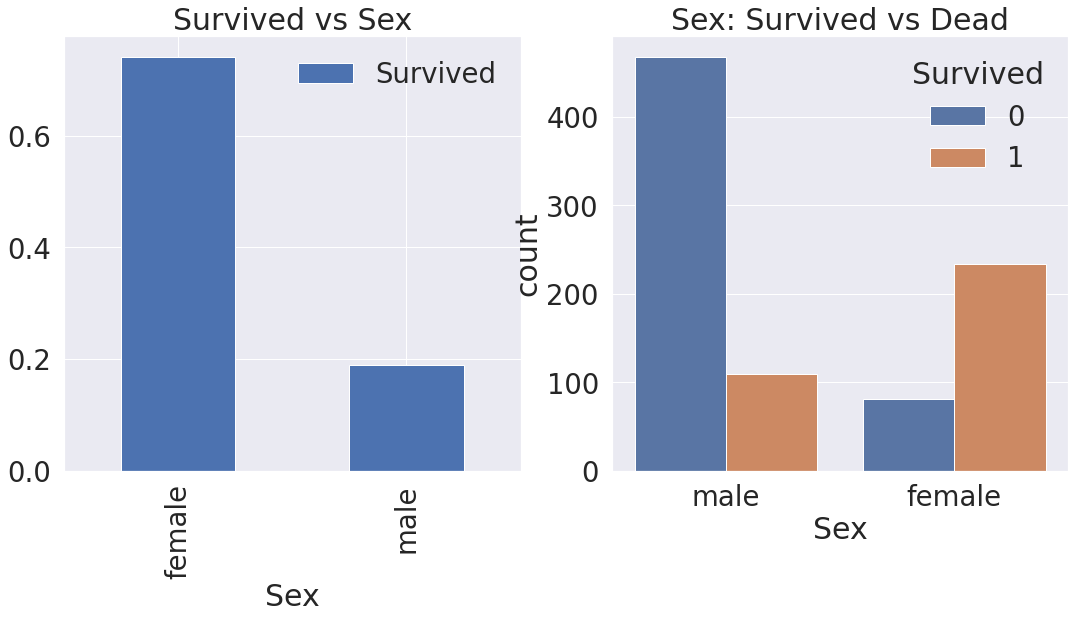

In [24]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

### 2.3 Both Sex and Pclass

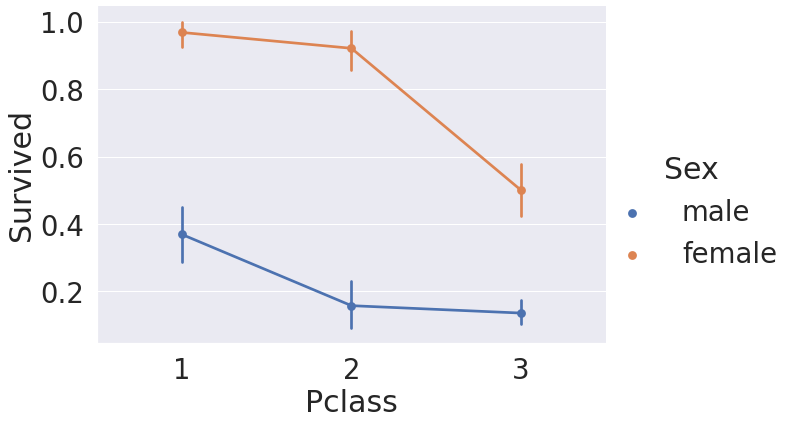

In [25]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

### 2.4 Age

In [26]:
print('제일 나이 많은 탑승객 : {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 Years
제일 어린 탑승객 : 0.4 Years
탑승객 평균 나이 : 29.7 Years


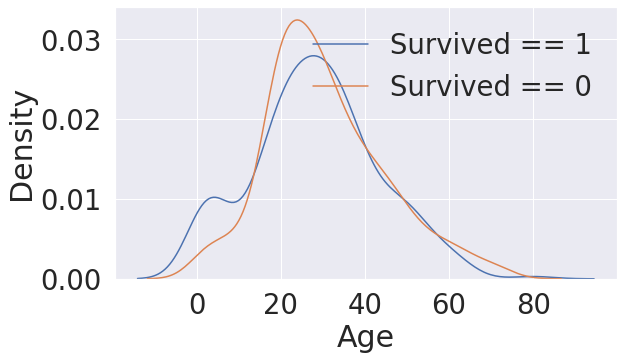

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])

plt.show()

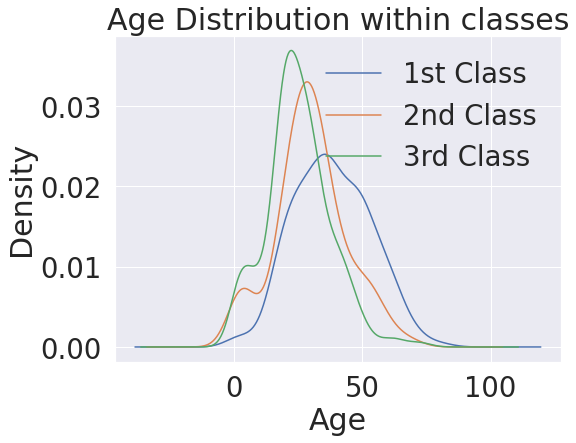

In [28]:
# 클래스별 나이 분포
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

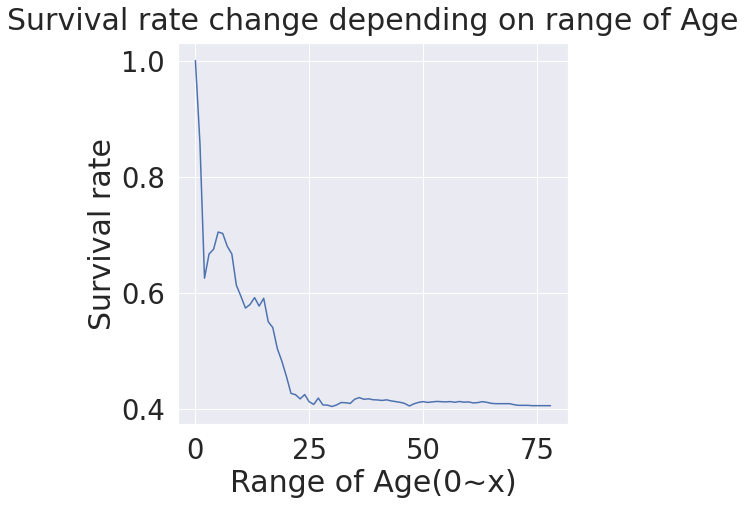

In [29]:
# 나이대 별 생존 확률
cummulate_survival_ratio = []

for i in range(1,80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

### 2.5 Embarked


In [30]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

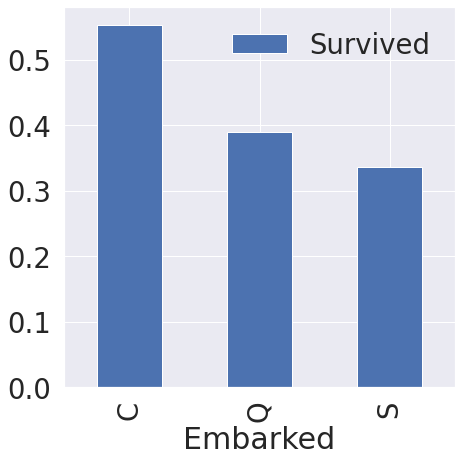

In [31]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

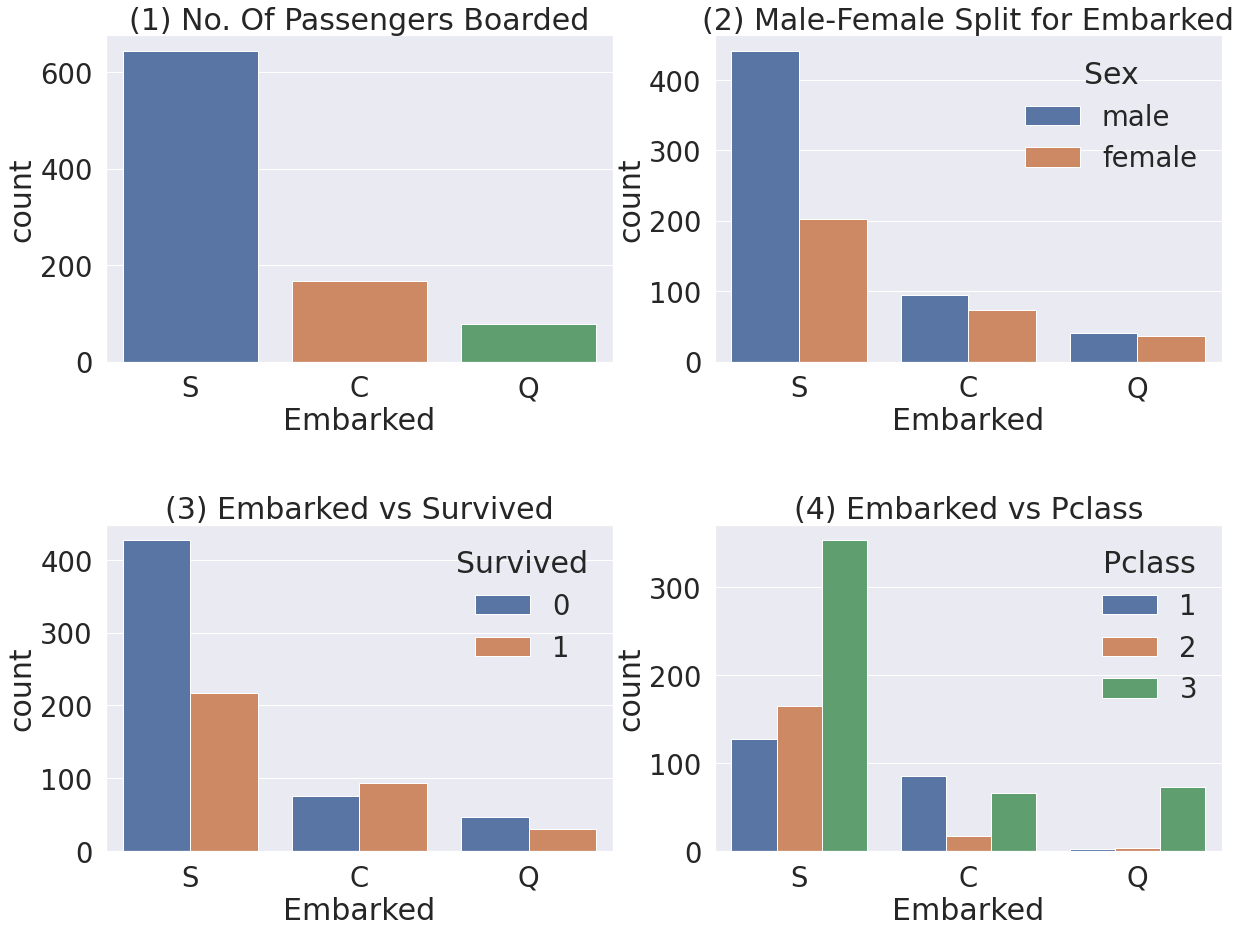

In [32]:
# 다른 feature들과 탑승구(Embarked) 관계
f, ax = plt.subplots(2,2, figsize=(20,15))
# Embarked 분포
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. Of Passengers Boarded')
# Embarked 와 성별
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
# Embarked 와 생존
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
# Embarked 와 클래스 의자
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

### 2.6 Family - SibSp(형제 자매) + Parch(부모, 자녀)

In [33]:
df_train['SibSp'].head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [34]:
df_train['Parch'].head() # parch - 함께 탑승한 부모, 자녀 수 총합

0    0
1    0
2    0
3    0
4    0
Name: Parch, dtype: int64

In [35]:
# 가족 = SibSp + Parch
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # 자신을 포함해야하니 1을 더해야 함
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [36]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


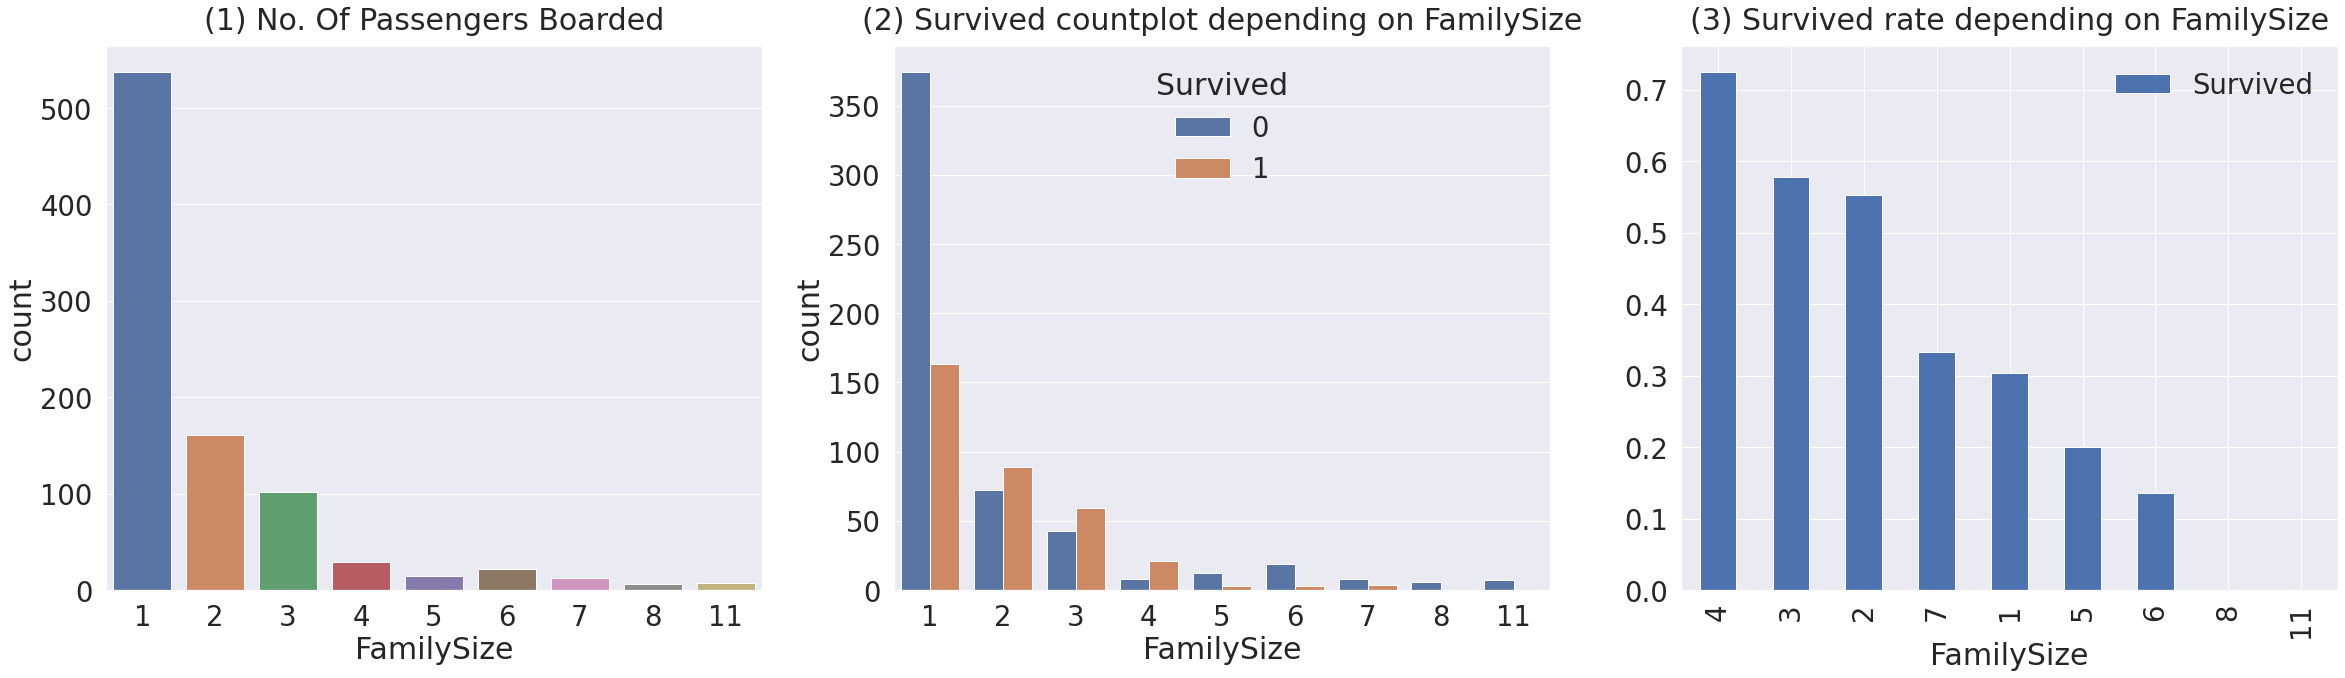

In [37]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.7 Fare

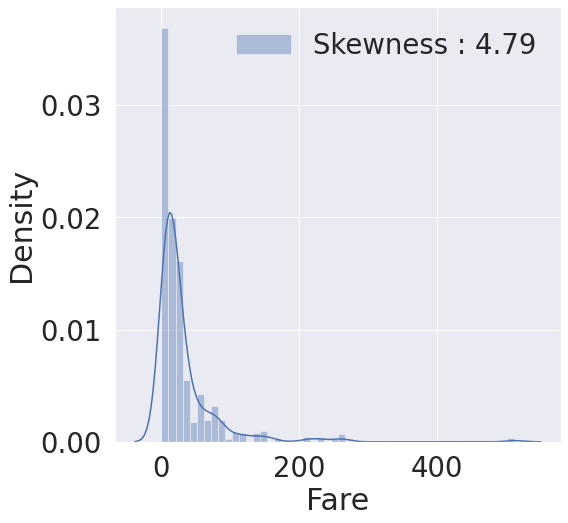

In [38]:
# 요금(Fare) 비대칭도 확인
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [39]:
# test data의 fare null값을 평균으로 채움
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() 

df_train['Fare'] = df_train['Fare'].map(lambda i : np.log(i) if i > 0 else 0) #로그변환
df_test['Fare'] = df_test['Fare'].map(lambda i : np.log(i) if i > 0 else 0)

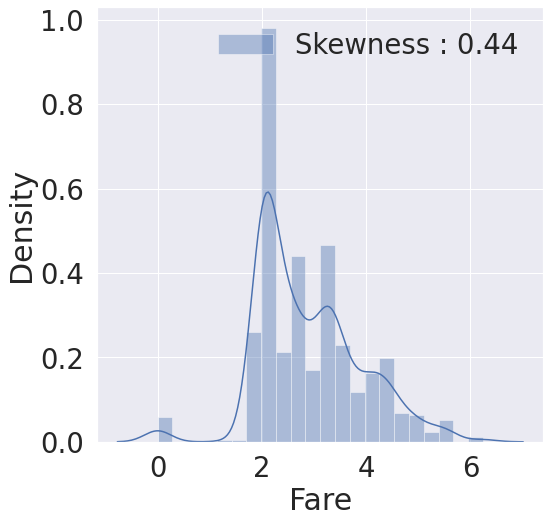

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

### 2.8 Cabin

In [41]:
# Cabin 피쳐의 null 비율 계산
df_train['Cabin'].isnull().sum() / df_train.shape[0]

0.7710437710437711

In [42]:
df_train.head()[['PassengerId', 'Cabin']]

,PassengerId,Cabin
0,1,NaN
1,2,C85
2,3,NaN
3,4,C123
4,5,NaN


### 2.9 Ticket¶

In [43]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

굉장히 다양한 티켓 넘버에서 어떤 특징을 이끌어내서 생존과 연결시킬 수 있는지 띵킹해보기

# 3. 특성 공학 (Feature Engineering)

* train 뿐만 아니라 test 도 똑같이 적용 

### 3.1 Fill Null

In [44]:
# 3.1.1 Fill Null in Age using title
df_train['Age'].isnull().sum()

177

In [45]:
# 이름에서 title 추출
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

In [46]:
# Initial 과 Sex 간의 count 
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [47]:
# Initial 정리
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [48]:
# Initial 들이 가지는 평균값들
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


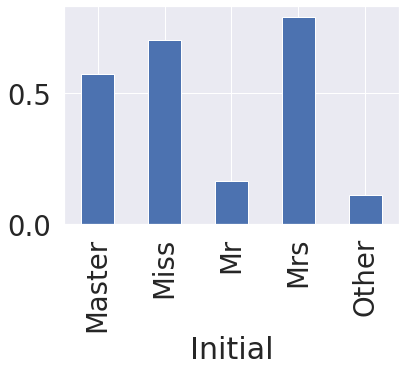

In [49]:
# Initial 별 생존
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [50]:
# statistics 을 이용하여 결측치 처리
# train data에서 얻은 statistics를 기반으로 test 의 null data를 채워야함 (?)
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [51]:
# initial 그룹별 Age 평균 값 계산 넣기
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33 # test에 train의 평균 넣음
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [52]:
df_train.isnull().sum()[df_train.isnull().sum() > 0] # null 체크

Cabin       687
Embarked      2
dtype: int64

In [53]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

Cabin    327
dtype: int64

[Null 처리하는 다른 방법](https://www.kaggle.com/yassineghouzam/titanic-top-4-with-ensemble-modeling)

In [54]:
# 3.1.2 Fill Null in Embarked
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [55]:
# 간단하게 채우기
df_train['Embarked'].fillna('S', inplace=True)

In [56]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Cabin    687
dtype: int64

### 3.2. Change Age(continuous to categorical)


In [57]:
# continuous 를 categorical 로 바꾸면 information loss 가능성 있음
def category_age(x):
    if x < 10:
        return 0 # ~9 
    elif x < 20: 
        return 1 # 10~19 #10대
    elif x < 30:
        return 2 # 20대
    elif x < 40:
        return 3 # 30대
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [58]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

- 보통 파생 피쳐 만든 후 원 컬럼을 제거

### 3.3 Change Initial, Embarked and Sex (string to numerical)

In [59]:
# Initial 수치화
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [60]:
# Embarked 수치화
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [61]:
# check
df_train['Embarked'].isnull().any() , df_train['Embarked'].dtypes

(False, dtype('int64'))

In [62]:
# Sex 수치화
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

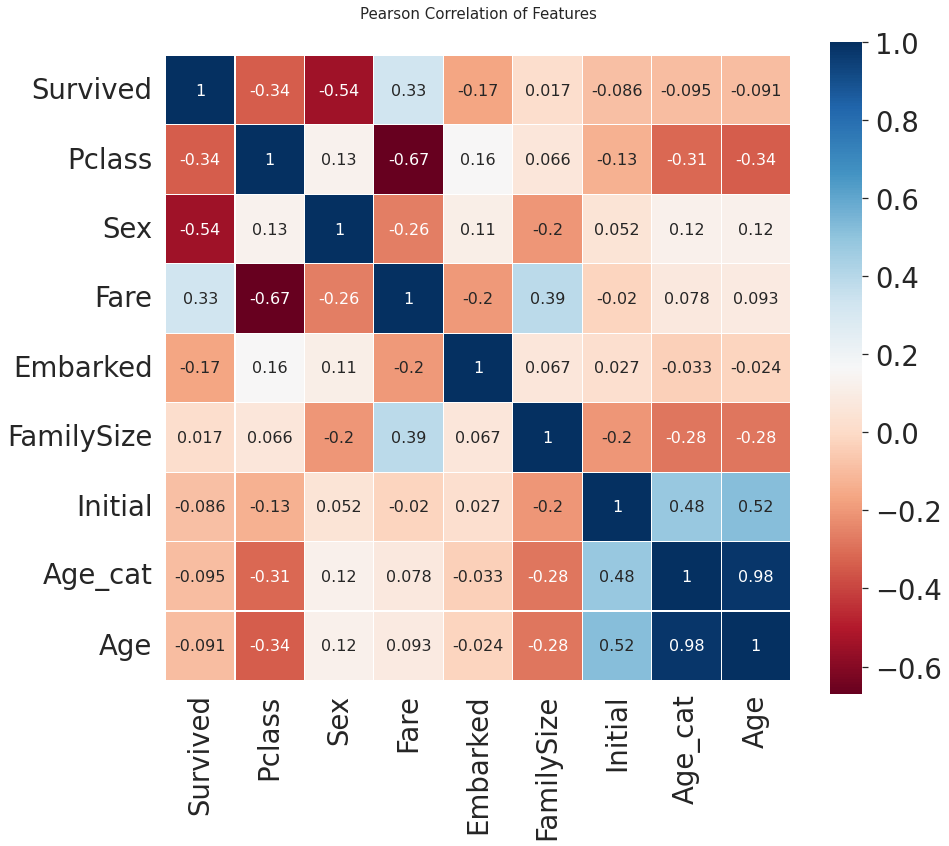

In [63]:
# 각 feature 간의 상관관계 # 히트맵 이용
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

colormap = plt.cm.RdBu # 컬러지정
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16}) # corr() 필수

del heatmap_data # 만들고 나서 데이터 삭제

### 3.4 One-hot encoding on Initial and Embarked¶


- 각 클래스간 연관성을 Orthogonal(직교, 동일하게) 만들 수 있음
- 수치화 했을 때의 문제 해결 방안

In [64]:
# get_dummies 이용
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [65]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [66]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,2,3,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,3,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,1,3,0,0,1,0,0,0,0,1


### 3.5 Drop columns

In [67]:
# 필요없는 피쳐 제거
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True) #  axis=1 열 드랍
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [68]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [69]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [70]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,2.057860,1,3,0,0,1,0,0,0,1,0
1,3,0,47.0,1.945910,2,4,0,0,0,1,0,0,0,1
2,2,1,62.0,2.270836,1,6,0,0,1,0,0,0,1,0
3,3,1,27.0,2.159003,1,2,0,0,1,0,0,0,0,1
4,3,0,22.0,2.508582,3,2,0,0,0,1,0,0,0,1


In [71]:
df_test.dtypes

Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

# 4. 모델 개발 및 학습

-  타이타닉 문제: target class(survived)가 있으며, target class 는 0, 1로 이루어져 있으므로(binary) binary classfication 문제

In [72]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics # 모델 평가
from sklearn.model_selection import train_test_split 

### 4.1 Preparation - Split dataset into train, valid(dev), test set


In [73]:
# 학습과 테스트 데이터 분리
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [74]:
X_train.shape, X_test.shape

((891, 14), (418, 14))

In [75]:
#  valid(dev) set을 따로 만들어 모델 평가
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.2, random_state=2018)

In [76]:
y_tr.shape, y_vld.shape

((712,), (179,))

### 4.2 Model generation and prediction

In [77]:
# 랜덤포레스트
model_rf = RandomForestClassifier()
model_rf.fit(X_tr, y_tr)
prediction = model_rf.predict(X_vld)

In [78]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 79.89% 정확도로 생존을 맞춤


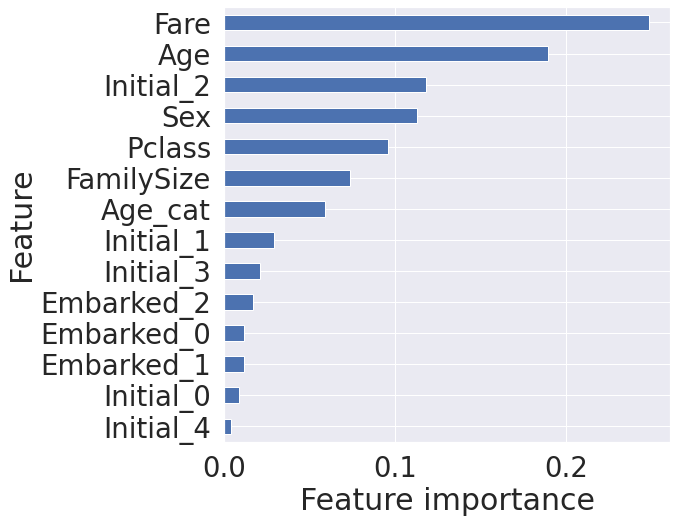

In [79]:
# feature importances
from pandas import Series

feature_importance = model_rf.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

# 4.B keras를 사용한 NN 모델 개발

In [80]:
pip install Adam

In [81]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
#from keras.optimizers import Adam, SGD 
# ImportError: cannot import name 'Adam' from 'keras.optimizers' (/usr/local/lib/python3.7/dist-packages/keras/optimizers.py)

from tensorflow.keras.optimizers import Adam 

In [82]:
# 딥러닝
nn_model = Sequential()
nn_model.add(Dense(32,activation='relu',input_shape=(14,)))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(64,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(32,activation='relu'))
nn_model.add(Dropout(0.2))
nn_model.add(Dense(1,activation='sigmoid'))

Loss = 'binary_crossentropy'
nn_model.compile(loss=Loss,optimizer=Adam(),metrics=['accuracy'])
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                480       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [83]:
history = nn_model.fit(X_tr,y_tr,
                    batch_size=64,
                    epochs=500,
                    validation_data=(X_vld, y_vld),
                    verbose=1)

Epoch 1/500
12/12 [==============================] - 2s 23ms/step - loss: 0.8853 - accuracy: 0.5449 - val_loss: 0.6627 - val_accuracy: 0.6425
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 0.8147 - accuracy: 0.5618 - val_loss: 0.6663 - val_accuracy: 0.6425
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 0.7456 - accuracy: 0.5646 - val_loss: 0.6573 - val_accuracy: 0.6480
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7148 - accuracy: 0.6096 - val_loss: 0.6313 - val_accuracy: 0.6536
Epoch 5/500
12/12 [==============================] - 0s 4ms/step - loss: 0.7036 - accuracy: 0.5927 - val_loss: 0.6430 - val_accuracy: 0.6536
Epoch 6/500
12/12 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5885 - val_loss: 0.6468 - val_accuracy: 0.6872
Epoch 7/500
12/12 [==============================] - 0s 5ms/step - loss: 0.6780 - accuracy: 0.5941 - val_loss: 0.6477 - val_accuracy: 0.7598
Epoch 8/500


In [84]:
history

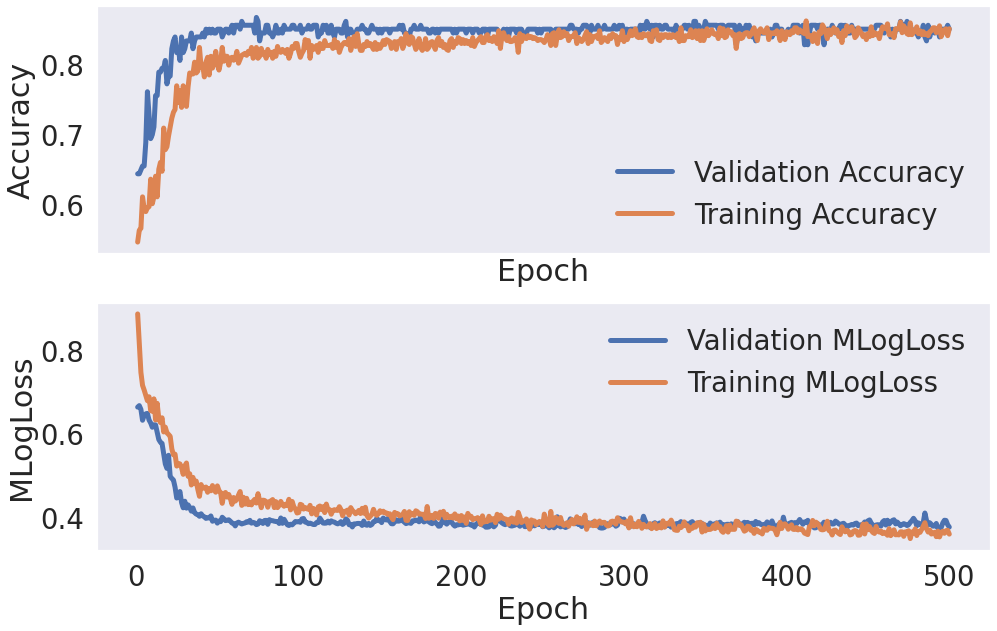

In [88]:
# history 시각화
hists = [history]
hist_df = pd.concat([pd.DataFrame(hist.history) for hist in hists], sort=True)
hist_df.index = np.arange(1, len(hist_df)+1)

fig, axs = plt.subplots(nrows=2, sharex=True, figsize=(16, 10))
axs[0].plot(hist_df.val_accuracy, lw=5, label='Validation Accuracy')
axs[0].plot(hist_df.accuracy, lw=5, label='Training Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].grid()
axs[0].legend(loc=0)
axs[1].plot(hist_df.val_loss, lw=5, label='Validation MLogLoss')
axs[1].plot(hist_df.loss, lw=5, label='Training MLogLoss')
axs[1].set_ylabel('MLogLoss')
axs[1].set_xlabel('Epoch')
axs[1].grid()
axs[1].legend(loc=0)
# fig.savefig('hist.png', dpi=300)

plt.show()

# 5. 모델 예측 및 평가

In [89]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [90]:
prediction = model_rf.predict(X_test)
df_submit['Survived'] = prediction

In [94]:
df_submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [ ]:
# df_submit.to_csv('my_first_submission.csv', index=False)

# 5.B NN 예측 및 평가

In [91]:
submission2 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data/sample_submission.csv')
prediction = nn_model.predict(X_test)
prediction = prediction > 0.5
prediction = prediction.astype(np.int)
prediction = prediction.T[0]
prediction.shape

(418,)

In [92]:
submission2['Survived'] = prediction
# submission2.to_csv('my_nn_submission.csv', index=False)

In [93]:
submission2.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
